## Multinomial Naïve Bayes

In this notebook, we will train a Multinomial Naïve Bayes on the IMDB movie reviews dataset and evaluate its performance. To address the limitation of Habib et al. (2023), where hyperparameter tuning of the Multinomial Naïve Bayes model was not conducted, we perform tuning using a range of alpha values. 

###### H. B. Habib, M. K. Chowdhury, M. T. Islam, M. S. Mahmud and A. Sattar (2023). Sentiment Classification for IMDB Movie Reviews in Benchmark Dataset Using LR, MNB and SGD. 2023 14th International Conference on Computing Communication and Networking Technologies (ICCCNT), Delhi, India, 2023, pp. 1-6, doi: 10.1109/ICCCNT56998.2023.10307321.





### 1. Loading the Dataset

In [2]:
import pandas as pd

# Load train dataset
train_df = pd.read_csv('data/train_set.csv')
print(train_df.head())

X_train = train_df['text']
y_train = train_df['sentiment']

# Load test dataset
test_df = pd.read_csv('data/test_set.csv')
print(test_df.head())

X_test = test_df['text']
y_test = test_df['sentiment']

                                                text  sentiment
0  clint eastwood play wound union soldier find g...          1
1  rent movie sound pretty interesting horror mov...          0
2  great example could great film great idea turn...          0
3  ok admit watch movie mystery science theater 3...          0
4  movie absolutely terrible not act awful sleep ...          0
                                                text  sentiment
0  attack killer tomato parody bad monster movie ...          0
1  pam grier star coffy nurse seek revenge drug d...          0
2  movie never imagine richard attenborough could...          1
3  patricia hunter oh professor also make habit c...          0
4  go generous give 3 live huntsville great see w...          0


### 2. Feature Extraction

This section of code performs feature extraction for text data using two different techniques: Bag of Words (BoW) and TF-IDF (Term Frequency-Inverse Document Frequency). The goal is to convert raw text data into numerical features that can be used by machine learning models for sentiment analysis.

Technique 1: Bag of Words

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
# ngram_range to capture phrases for sentiment, especially negatations
# min_df removes extremely rare words in less than 2 reviews
# max_df removes words that appear in more than 90% of reviews; likely corpus-specific stopwords (eg. movies, films) that may not help distinguish sentiments

bow_vectorizer = CountVectorizer(ngram_range=(1,3), min_df=2, max_df=0.9)

# Fit and transform the training data
X_train_BoW = bow_vectorizer.fit_transform(X_train)
X_test_BoW = bow_vectorizer.transform(X_test)

Technique 2: Term Frequency - Inverse Document Frequency (TF-IDF)

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

# ngram_range to capture phrases for sentiment, especially negatations
# min_df removes extremely rare words in less than 2 reviews
# max_df removes words that appear in more than 90% of reviews; likely corpus-specific stopwords (eg. movies, films) that may not help distinguish sentiments

vectorizer = TfidfVectorizer(ngram_range=(1,3), min_df=2, max_df=0.9)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

### 3. Hyperparameter Tuning, Model Training and Cross-Validation (Multinomial Naïve Bayes)

In this section, the performance of Multinomial Naïve Bayes is compared across two different text representations: (1) Bag-of-Words (BoW) and (2) TF-IDF. Each model with a range of alpha values is evaluated using 5-fold stratified cross-validation. Final models are trained on the full training data.

In [5]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_validate

# Initialise stratified 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

Testing alpha=0...


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero e

Testing alpha=0.1...
Testing alpha=0.2...
Testing alpha=0.3...
Testing alpha=0.4...
Testing alpha=0.5...
Testing alpha=0.6...
Testing alpha=0.7...
Testing alpha=0.8...
Testing alpha=0.9...
Testing alpha=1...

Best Hyperparameter: alpha=0.9
Best Cross-Validation Accuracy: 0.8847


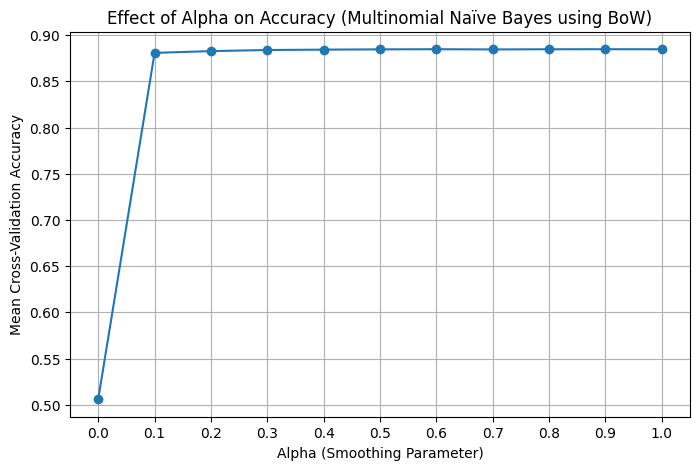

In [6]:
# BoW evaluation
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Hyperparameter candidate -- to address limitation
alphas = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Store results
best_score = 0
best_alpha = None
results = []

# Hyperparameter tuning using cross-validation
for alpha in alphas:
    print(f"Testing alpha={alpha}...")

    # Define and evaluate the model
    nb_model = MultinomialNB(alpha=alpha)
    cv_scores = cross_val_score(nb_model, X_train_BoW, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
    mean_cv_score = cv_scores.mean()

    # Store the results
    results.append((alpha, mean_cv_score))

    # Track the best hyperparameter
    if mean_cv_score > best_score:
        best_score = mean_cv_score
        best_alpha = alpha

# Convert results to a NumPy array for easy plotting
results_array = np.array(results)

# Best hyperparameter found
print(f"\nBest Hyperparameter: alpha={best_alpha}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

### PLOTS ###

# Extract alphas and scores
alphas = results_array[:, 0].astype(float)
scores = results_array[:, 1].astype(float)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(alphas, scores, marker='o')
plt.xlabel("Alpha (Smoothing Parameter)")
plt.ylabel("Mean Cross-Validation Accuracy")
plt.title("Effect of Alpha on Accuracy (Multinomial Naïve Bayes using BoW)")
plt.grid(True)
plt.xticks(alphas)
plt.show()

Testing alpha=0...


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero e

Testing alpha=0.1...
Testing alpha=0.2...
Testing alpha=0.3...
Testing alpha=0.4...
Testing alpha=0.5...
Testing alpha=0.6...
Testing alpha=0.7...
Testing alpha=0.8...
Testing alpha=0.9...
Testing alpha=1...

Best Hyperparameter: alpha=0.1
Best Cross-Validation Accuracy: 0.8927


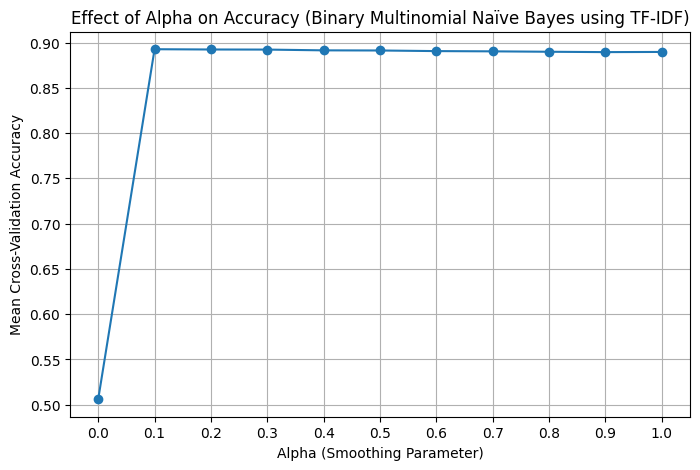

In [7]:
# TF-IDF evaluation
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Hyperparameter candidate
alphas = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Store results
best_score = 0
best_alpha = None
results = []

# Hyperparameter tuning using cross-validation -- to address limitation
for alpha in alphas:
    print(f"Testing alpha={alpha}...")

    # Define and evaluate the model
    nb_model = MultinomialNB(alpha=alpha)
    cv_scores = cross_val_score(nb_model, X_train_vec, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
    mean_cv_score = cv_scores.mean()

    # Store the results
    results.append((alpha, mean_cv_score))

    # Track the best hyperparameter
    if mean_cv_score > best_score:
        best_score = mean_cv_score
        best_alpha = alpha

# Convert results to a NumPy array for easy plotting
results_array = np.array(results)

# Best hyperparameter found
print(f"\nBest Hyperparameter: alpha={best_alpha}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

### PLOTS ###

# Extract alphas and scores
alphas = results_array[:, 0].astype(float)
scores = results_array[:, 1].astype(float)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(alphas, scores, marker='o')
plt.xlabel("Alpha (Smoothing Parameter)")
plt.ylabel("Mean Cross-Validation Accuracy")
plt.title("Effect of Alpha on Accuracy (Binary Multinomial Naïve Bayes using TF-IDF)")
plt.grid(True)
plt.xticks(alphas)
plt.show()

### 4. Model Evaluation (on test set)

In this section, final models are evaluated on the test set for classification performance using classification report and confusion matrix.

Naïve Bayes Accuracy (alpha=0.9):
Train Accuracy: 0.9792
Test Accuracy: 0.8869
--------------------------------------------------

BoW Classification Report:
              precision    recall  f1-score   support

    negative       0.89      0.88      0.89      5000
    positive       0.88      0.89      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000


Confusion Matrix:


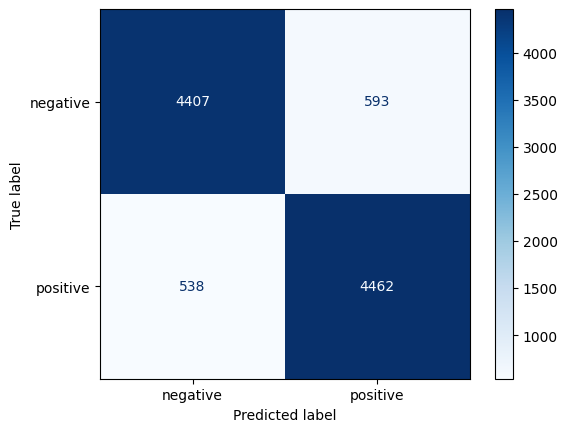

In [8]:
# BoW evaluation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

alpha = 0.9

# Define the Naïve Bayes model with the chosen alpha
nb_model = MultinomialNB(alpha=alpha)

# Train the model on the training data
nb_model.fit(X_train_BoW, y_train)

# Predict on the train and test set
y_train_pred = nb_model.predict(X_train_BoW)
y_test_pred = nb_model.predict(X_test_BoW)

# Compute Train and Test Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print Train and Test Accuracy
print(f"Naïve Bayes Accuracy (alpha={alpha}):")
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("-" * 50)  # Separator for clarity

# Classification report for BoW
print("\nBoW Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=["negative", "positive"]))
print(f"\n{'='*40}")

# Confusion matrix visualization
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["negative", "positive"])
disp.plot(cmap=plt.cm.Blues)
plt.show()
        


Naïve Bayes Accuracy (alpha=0.1):
Train Accuracy: 0.9930
Test Accuracy: 0.8937
--------------------------------------------------

TF-IDF Classification Report:
              precision    recall  f1-score   support

    negative       0.90      0.89      0.89      5000
    positive       0.89      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000


Confusion Matrix:


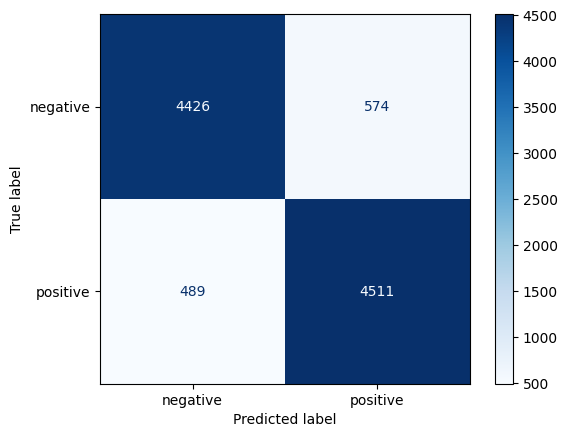

In [9]:
# TF-IDF evaluation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

alpha = 0.1

# Define the Naïve Bayes model with the chosen alpha
nb_model = MultinomialNB(alpha=alpha)

# Train the model on the training data
nb_model.fit(X_train_vec, y_train)

# Predict on the train and test set
y_train_pred = nb_model.predict(X_train_vec)
y_test_pred = nb_model.predict(X_test_vec)

# Compute Train and Test Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print Train and Test Accuracy
print(f"Naïve Bayes Accuracy (alpha={alpha}):")
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("-" * 50)  # Separator for clarity

# Classification report for BoW
print("\nTF-IDF Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=["negative", "positive"]))
print(f"\n{'='*40}")

# Confusion matrix visualization
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["negative", "positive"])
disp.plot(cmap=plt.cm.Blues)
plt.show()
        


The evaluation of the two versions of logistic regression — BoW and TF-IDF — shows similar performance across most key metrics, including precision, recall, and F1-score, but TF-IDF has a slightly higher accuracy than BoW. All metrics achieve around 89% on the unseen dataset, demonstrating strong generalization ability.
